In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

In [4]:
model = tf.keras.Sequential()

In [5]:
# units == output shape, input_dim == input shape
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [6]:
sgd = tf.keras.optimizers.SGD(lr=0.1)  # SGD == standard gradient descendent, lr == learning rate

In [7]:
model.compile(loss='mse', optimizer=sgd)  # mse == mean_squared_error, 1/m * sig (y'-y)^2

In [8]:
# prints summary of the model to the terminal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit() executes training
#from tqdm.keras import TqdmCallback
#tf.model.fit(x_train, y_train, epochs=200, verbose=0, callbacks=[TqdmCallback(verbose=0)])
history = model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1529
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1410
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1231
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1087
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 11/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0961
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0905
Epoch 13/200
1/1 [==============================] - 0s 1ms/st

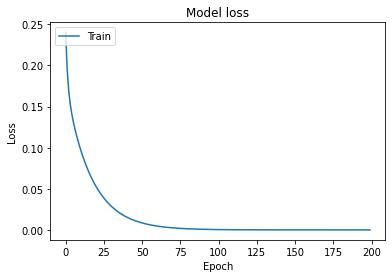

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# predict() returns predicted value
y_predict = model.predict(np.array([5, 4]))

In [12]:
print(y_predict)

[[-3.9983506]
 [-2.9991512]]
